# Tarea 3 - Máquinas de Aprendizaje
## Métodos No-Lineales
### Integrantes: Gabriel Jara, Daniel San Martín

## 1. Small Circle inside Large Circle

El objetivo de esta sección es experimentar con algunos modelos no-lineales sobre un problema de juguete
generado para visualizar algoritmos de *clustering*. Se trata de un problema de clasificación a todas luces
linealmente inseparable, en el sentido que, si denotamos por $\textbf{x}\in\mathbb{R}^2$ un patrón de entrada y por $y\in\{0, 1\}$ su correspondiente etiqueta, no existen $\textbf{w}\in\mathbb{R}^2$ , $b\in\mathbb{R}$ tal que $y(\textbf{w}^T\textbf{x} + b) \geq \rho > 0$. El problema nos permite
hacer un recorrido rápido por las grandes ideas en la búsqueda de la no-linealidad.

<img src="img/1.png">
<center>Figura 1: Distribución deseada para la actividad 1. Los 2 colores representan 2 clases distintas.</center>

(a) Escriba una función que genere (aleatoriamente) n datos etiquetados de la forma $\{(\textbf{x}_1, y_1), ..., (\textbf{x}_n, y_n)\}$, $\textbf{x}_i \in \mathbb{R}^2, ~ y_i \in \{0, 1\}$, con una distribución de probabilidad que refleje la configuración linealmente inseparable que muestra la Fig. 1$^3$. Utilice esta función para crear $1000$ datos de entrenamiento y $1000$ datos de pruebas. Para medir la tendencia de los modelos a sobre-ajuste, agregue un $5\%$ de ruido al dataset, generando $\textbf{x}$’s cercanos a la frontera. Genere un gráfico que muestre datos de entrenamiento y pruebas, identificando cada clase con un color diferente (como lo muestra la Fig. 1).

$^3$Puede generar datos aleatorios distribuidos de manera circular para luego etiquetar aquellos ubicados en el cı́rculo interior como $1$ y en el cı́rculo exterior $0$.

In [17]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
    np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
    np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.5, random_state=42)
    return X_train, y_train, X_test, y_test

Para lo que sigue de la actividad utilice la siguiente función para graficar las fronteras de clasificación
en base a la probabilidad que asigna cada algoritmo a la clase de un ejemplo.

In [11]:
import matplotlib.pyplot as plt

def plot_classifier(clf, X_train, Y_train, X_test, Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')        
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.show()

(b) Demuestre <u>experimentalmente</u> que una red neuronal artificial correspondiente a $1$ sola neurona (i.e. sin capas escondidas) no puede resolver satisfactoriamente el problema. Puede utilizar la función de activación y el método de entrenamiento que prefiera. Sea convincente: por ejemplo, intente modificar los parámetros de la máquina de aprendizaje, reportando métricas que permitan evaluar el desempeño
del modelo en el problema con cada cambio efectuado. Adapte también la función ```plot_classifier``` para que represente gráficamente la solución encontrada por la red neuronal. Describa y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.

In [22]:
X_train, Y_train, X_test, Y_test = do_circles()

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

n_h = 1
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(n_h, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


Epoch 1/50
1000/1000 [==============================] - 0s - loss: 0.6937 - acc: 0.4930     
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 0.6933 - acc: 0.5080     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 0.6931 - acc: 0.4970     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 0.6924 - acc: 0.5260     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 0.6903 - acc: 0.5680     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 0.6847 - acc: 0.5770     
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 0.6735 - acc: 0.6270     
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 0.6568 - acc: 0.5780     
Epoch 9/50
1000/1000 [==============================] - 0s - loss: 0.6371 - acc: 0.6190     
Epoch 10/50
1000/1000 [==============================] - 0s - loss: 0.6208 - acc: 0.6480     
Epoch 11/50
1000/1000 [==============================] - 0s - loss: 0

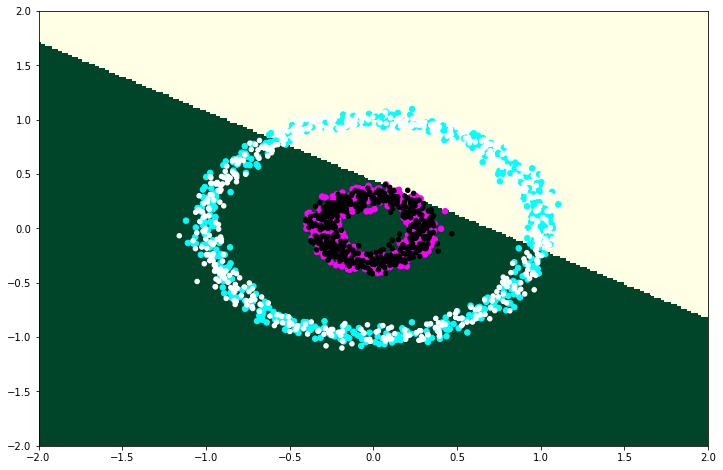

In [24]:
plot_classifier(model, X_train, Y_train, X_test, Y_test, 'ann')

(c) Demuestre <u>experimentalmente</u> que una red neuronal artificial con $1$ capa escondida puede resolver satisfactoriamente el problema obtenido en (a). Puede utilizar la arquitectura y el método de entrenamiento que prefiera, pero en esta actividad puede optar tranquilamente por usar los hiper-parámetros que se entregan como referencia en el código de ejemplo. Cambie el número de neuronas $N_h$ en la red entre $2$ y $32$ en potencias de $2$, graficando el error de entrenamiento y pruebas como función de $N_h$. Describa y explique lo que observa. Utilice la función plot classifier, diseñada anteriormente, para construir gráficos de la solución en algunos casos representativos.

In [26]:
n_h = 32
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

Epoch 1/50
1000/1000 [==============================] - 0s - loss: 0.6921 - acc: 0.5090     
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 0.6881 - acc: 0.5790     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 0.6746 - acc: 0.7250     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 0.6420 - acc: 0.8030     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 0.5748 - acc: 0.8780     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 0.4766 - acc: 0.9590     
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 0.3559 - acc: 1.0000     
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 0.2511 - acc: 1.0000     
Epoch 9/50
1000/1000 [==============================] - 0s - loss: 0.1781 - acc: 1.0000     
Epoch 10/50
1000/1000 [==============================] - 0s - loss: 0.1306 - acc: 1.0000     
Epoch 11/50
1000/1000 [==============================] - 0s - loss: 0

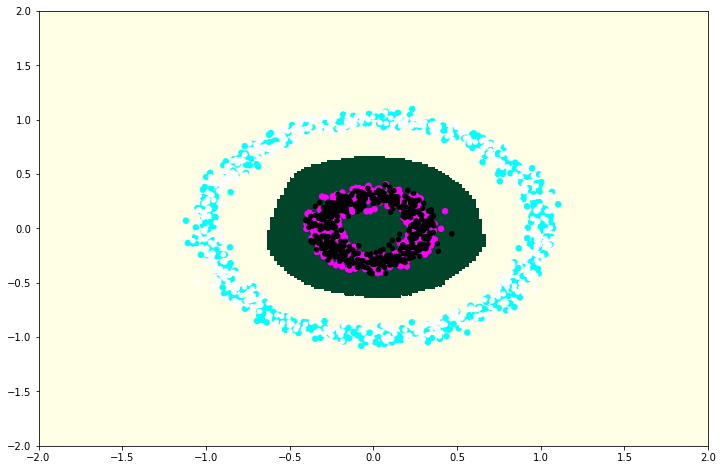

In [27]:
plot_classifier(model, X_train, Y_train, X_test, Y_test, 'ann')

(d) Demuestre <u>experimentalmente</u> que stump (árbol de clasificación de $1$ nivel) no puede resolver satisfactoriamente el problema anterior. Puede utilizar el criterio y la función de partición que prefiera. Sea
convincente: por ejemplo, intente modificar los parámetros de la máquina, reportando métricas que permitan evaluar el desempeño del modelo en el problema con cada cambio efectuado. Adapte también la función ```plot_classifier``` para que represente gráficamente la solución encontrada por el árbol. Describa y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.

Test Accuracy = 0.670000
1


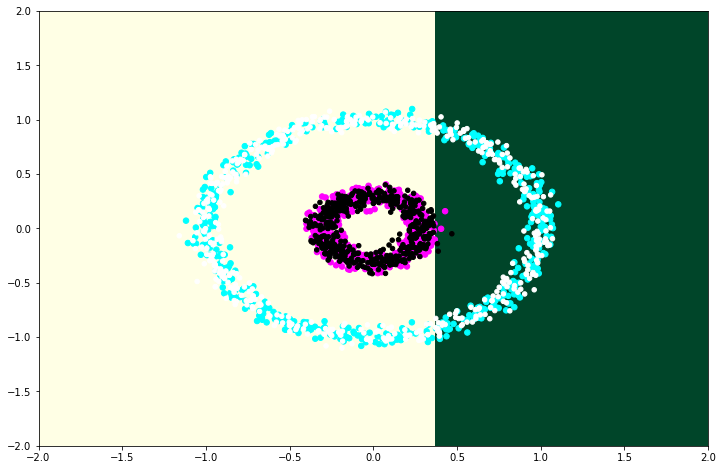

In [28]:
from sklearn.tree import DecisionTreeClassifier as Tree

clf=Tree(criterion='gini', splitter='best', random_state=0, max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

(e) Demuestre experimentalmente que un árbol de clasificación de múltiples niveles puede resolver satisfactoriamente el problema estudiado. Puede utilizar el criterio y la función de partición que prefiera, pero puede optar tranquilamente por usar los hiper-parámetros que se entregan como referencia en el código de ejemplo. Cambie el número de niveles admitidos en el árbol $N_t$ entre $2$ y $20$, graficando el error de entrenamiento y pruebas como función de $N_t$. Describa y explique lo que observa. Utilice la función ```plot_classifier```, diseñada anteriormente, para construir gráficos de la solución en algunos casos representativos.

Test Accuracy = 0.992000
5


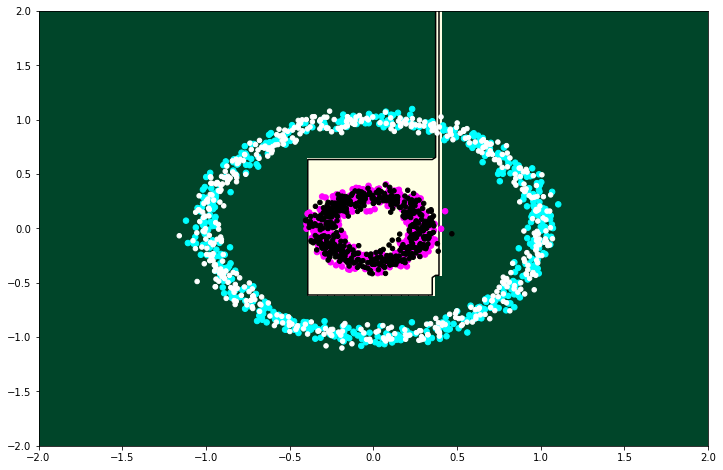

In [29]:
n_t=8
clf=Tree(criterion='gini', splitter='best', random_state=0, max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

(f) Como ya se demostró experimentalmente que este problema es linealmente inseperable, ahora se pide experimentar otra alternativa. Para ello deberá realizar una proyección de los datos a un nuevo espacio dimensional (manifold) en el cual se reconozcan sus patrones no lineales, para poder trabajarlos con fronteras lineales. Utilice la técnica de PCA con la ayuda de un Kernel Gaussiano ([2]) para extraer sus vectores con dimensión infinita de mayor varianza.

In [31]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

(g) Ajuste un algoritmo de aprendizaje con fronteras lineal para los datos proyectados en este nuevo espacio que captura sus componentes no lineales, muestre graficamente que el problema ahora puede ser resulto con estos métodos. Reporte métricas para evaluar el desempeño, comente y concluya.

Test Accuracy = 1.000000
1


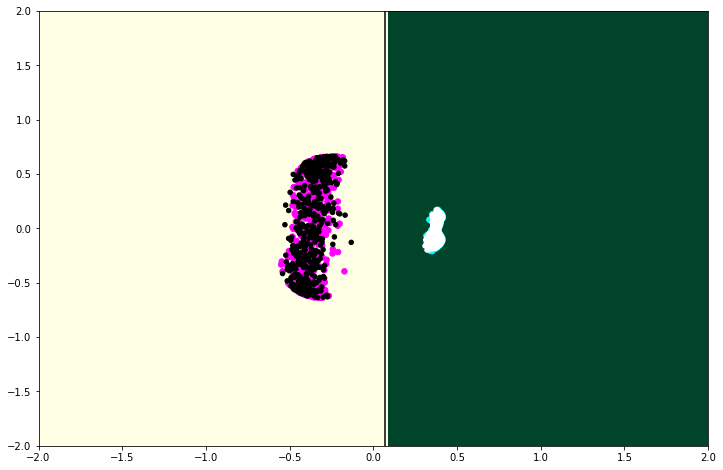

In [32]:
clf=Tree(criterion='gini', splitter='best', random_state=0, max_depth=1)
clf.fit(Xkpca_train, Y_train)
acc_test = clf.score(Xkpca_test, Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf, Xkpca_train, Y_train, Xkpca_test,Y_test,'tree')

## 2. Bike Sharing: Predicción de Demanda Horaria

En esta sección simularemos nuestra participación en el desafı́o Bike Sharing Demand de Kaggle [3]. El objetivo es predecir la demanda de bicicletas sobre la red Capital Bikeshare de la ciudad de Washington, D.C., en función de la hora del dı́a y otras variables descritas en la tabla 1. En principio, y como muestra la figura, la función es altamente no lineal y no determinista como función de la hora del dı́a. Su objetivo será entrenar un modelo para obtener un puntaje correspondiente al top-100 del "leaderboard" final, es decir superior o igual a $0.37748$. La función utilizada para evaluar este concurso Kaggle se proporciona en la siguiente ecuación:

\begin{equation}
    E_{bikes}(\textbf{y},\hat{\textbf{y}}) = \frac1n \sum_i (\ln(y_i + 1) - \ln(\hat{y}_i + 1))^2,
\end{equation}

donde $\textbf{y},\hat{\textbf{y}} \in \mathbb{R}^n$ denotan los vectores de observaciones y predicciones respectivamente. Como el dataset de pruebas original no está disponible se fabricará uno, correspondiente al $20\%$ de los datos de entrenamiento. Además, se pondrá a su disposición un subconjunto independiente de datos con propósitos de validación. Usted podrá descargar los archivos correspondientes al subconjunto de entrenamiento y pruebas a utilizar ejecutando los siguientes comandos:

```wget http://octopus.inf.utfsm.cl/~ricky/bike_sharing_train.csv```

```wget http://octopus.inf.utfsm.cl/~ricky/bike_sharing_val.csv```

```wget http://octopus.inf.utfsm.cl/~ricky/bike_sharing_test.csv```

<img src="img/2.png">
<center>Tabla 1: Atributos para el Problema 2 (*Bike Sharing*).</center>

(a) Cargue los datos de entrenamiento y pruebas como dataframes de *pandas*. Describa las variables invo-
lucradas en el problema, explorando el tipo de datos de que se trata, el número de valores distintos y, si
corresponde, un gráfico (e.g. un histograma) que resuma su comportamiento. Su primera operación de
pre-procesamiento de datos será obtener la hora del dı́a desde el campo fecha (que en este momento es
de tipo string), creando una nueva columna denominada *hour* y de tipo *int*. Para hacer esta operación
se concatenarán los dataframes de entrenamiento y pruebas y luego se volverán a separar manteniendo
la separación original.

In [57]:
import pandas as pd
import numpy as np

dftrain = pd.read_csv('data/bike_sharing_train.csv')
dfval = pd.read_csv('data/bike_sharing_val.csv')
dftest = pd.read_csv('data/bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print '\nSummary - dataframe completo:\n'
print df.describe()
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])


Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159    

(b) Entrene un árbol de regresión para resolver el problema usando parámetros por defecto. Con este
fin, construya una matriz $\textbf{X}_{train}$ de forma $n_{train} \times d_1$ que contenga los datos de entrenamiento en sus filas, seleccionando las columnas que desee/pueda utilizar para el entrenamiento. Implemente además, la función de evaluación que hemos definido anteriormente para este problema. Evalúe el árbol de regresión ajustado a los datos de entrenamiento sobre el conjunto de entrenamiento y pruebas. Construya un gráfico que compare las predicciones con los valores reales. En este punto usted debiese tener un modelo con puntaje del orden de $0.59$, lo que lo dejará más o menos en la posición $2140$ de la competencia.

/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL TEST =0.574239


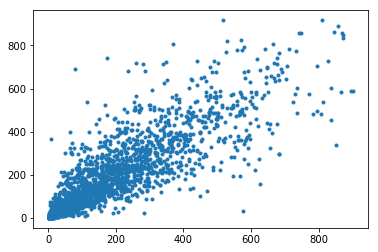

In [61]:
from sklearn.tree import DecisionTreeRegressor as Tree
import matplotlib.pyplot as plt

def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp',
'humidity','windspeed','hour']]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print "SCORE TEST=%f"%score_test

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL TEST =%f"%kagg_test
plt.plot(Y_test,Y_pred_test,'.')
plt.show()

(c) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones a los hiper-parámetros del modelo. Por ejemplo, como estos modelos tienden a sobre-ajustar, podrı́a intentar limitar la profundidad del árbol (¿Por qué esto debiese ayudar?). Naturalmente, está absolutamente prohibido tomar este tipo de decisiones en función del resultado de pruebas. Debe realizar estas elecciones evaluando sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada
u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del
entrenamiento. Con estas modificaciones debiese poder mejorar su ranking en unas $300$ posiciones.

In [62]:
model = Tree(random_state=0,max_depth=20)
model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL VAL =%f"%kagg_val

KAGG EVAL VAL =0.546219


(d) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones sobre la representa-
ción utilizada para aprender desde los datos. Por ejemplo, los histogramas que construyó en el punto
(a) ası́ como la forma especial de la función de evaluación, sugieren una cierta transformación de la
variable respuesta. Podrı́a intentar también normalizando los datos o normalizando la respuesta. Otra
opción es intentar rescatar algo más acerca de la fecha (anteriormente sólo se extrajo la hora), como por
ejemplo el año o el dı́a de la semana (’lunes’,’martes’, etc) que corresponde. Sea creativo, este paso le
debiese reportar un salto de calidad muy significativo. Una observación importante es que si hace una
transformación a la variable respuesta (por ejemplo raı́z cuadrada), debe invertir esta transformación
antes de evaluar el desempeño con eval bikemodel (por ejemplo, elevar al cuadrado si tomó raı́z cua-
drada). Con modificaciones de este tipo, podrı́a mejorar su ranking en unas $1000$ posiciones, entrando
ya al top-$1000$ con un score del orden de $0.45$.

In [63]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
Xdf = df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]

(e) Entrene una SVM no lineal para resolver el problema midiendo el efecto de las distintas representaciones
que haya descubierto hasta este punto. Un detalle importante es que antes de entrenar la SVM serı́a
aconsejable hacer dos tipos de pre-procesamiento adicional de los datos: (i) codificar las variables
categóricas en un modo apropiado - por ejemplo como vector binario con un 1 en la posición del
valor adoptado-, (ii) escalar los atributos de modo que queden centrados y con rangos comparables.
Usando parámetros por defecto para la SVM debiese obtener un score del orden de $0.344$, quedando
definitivamente en el top-$10$ de la competencia.

In [ ]:
#load dataframes as before ...
df = pd.concat([dftrain,dfval,dftest])
df[’hour’] = pd.to_datetime(df[’datetime’]).apply(lambda x: x.strftime(’%H’))
df[’cday’] = pd.to_datetime(df[’datetime’]).dt.dayofweek
df[’hour’] = pd.to_numeric(df[’hour’])
df[’cday’] = pd.to_numeric(df[’cday’])
Xdf=df.ix[:,[’season’,’holiday’,’workingday’,’weather’,’temp’,’atemp’,
’humidity’,’windspeed’,’hour’,’cday’]]
#PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf,columns=[’season’, ’weather’,’hour’,’cday’])
Ydf=df.ix[:,’count’]

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

(f) Mejore la SVM definida en el punto anterior haciendo modificaciones a los hiper-parámetros de la
máquina ($C$, $\epsilon$ o la misma función de kernel). Naturalmente, está absolutamente prohibido tomar este
tipo de decisiones de diseño mirando el resultado de pruebas. Debe realizar estas elecciones evaluan-
do sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada
u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del
entrenamiento.

In [64]:
model = SVR(C=1,epsilon=0.01)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val

NameError: name 'SVR' is not defined

(g) Evalúe el efecto de utilizar el dataset de validación para entrenamiento y seleccionar los parámetros estructurales del árbol de clasificación y la SVM usando validación cruzada. El código de ejemplo para esto ha sido proporcionado en las tareas $1$ y $2$, pero se adjunta de nuevo a continuación

In [65]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
        model = #define your model
        model.fit(Xm[train], ym[train])
        yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
        mse_cv += score_fold
mse_cv = mse_cv / 10

SyntaxError: invalid syntax (<ipython-input-65-3aca01cd123f>, line 6)

(h) Evalúe el efecto de utilizar un ensamblado de $2$ máquinas de aprendizaje para predecir la demanda
total de bicicletas. Un modelo se especializará en la predicción de la demanda de bicicletas de parte
de usuarios registrados y otra en la predicción de la demanda de usuarios casuales. Hay razones claras
para pensar que los patrones son distintos.

In [66]:
Ydf=df.ix[:,'count'] #demanda total
Ydf=df.ix[:,'registered'] #demanda registrada
Ydf=df.ix[:,'casual'] #demanda casual

(i) Evalúe el efecto de utilizar un algoritmo genérico para ensamblar máquinas de aprendizaje para predecir
la demanda total de bicicletas. Puede experimentar con una sola técnica (e.g. Random Forest), discuta
la evolución a medida que aumenta el número de máquinas.

In [67]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,max_depth=max_depth,random_state=0)

NameError: name 'max_depth' is not defined

## 3. Calidad de un Vino

Dentro de las variedades del vino, existen distintas calidades de este, donde algunos gustan mas a algunas personas que otras, esto depende de la gran cantidad de quı́micos y procesos que se aplican a la producción de vino. Para el área de negocios el estimar cuál es la calidad del vino en base a la apreciación de la gente es una tarea bastante difı́cil.
Para esta actividad se trabajará con dos datasets asociados a variantes tinto y blanco del vino Portugués "Vinho Verde" [4]. Debido a temas privados solo se cuenta atributos fisioquímicos asociados a un vino en particular, los cuales corresponden a $11$ atributos numéricos descritos en el siguiente link. Este problema puede ser abordado como clasificación de $11$ clases o de regresión, ya que el atributo a estimar, la calidad quality, es un valor entero entre $0$ y $10$

(a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

In [36]:
import pandas as pd
df_red = pd.read_csv("data/winequality-red.csv",sep=";")
df_white = pd.read_csv("data/winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0)
#genere atributo ’tipo’

In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


(b) Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de calidad o no, es decir, utilice las distintas características fisioquı́micas presentes en los datos para estimar esta etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos conjuntos, considerando como quality mayor a $5$ un vino de buena calidad. El conjunto de pruebas ($25 \%$) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.

In [39]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]
#train and test split over df

(c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los hiper-parámetros que prefiera, recuerde que las decisiones no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las dos clases mida la métrica *F1-score* [5] sobre el conjunto de entrenamiento y de pruebas.

(d) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de *Random Forest*. Varı́e la cantidad de árboles de decisión utilizados en el ensamblado (```n_estimators```), realice un gráfico resumen del *F1-score* de entrenamiento y de pruebas en función de este hiper-parámetro.

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=, max_depth=,n_jobs=-1)

SyntaxError: invalid syntax (<ipython-input-40-85e383c7cdad>, line 2)

(e) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de *AdaBoost*. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (```n_estimators```), realice un gráfico resumen del *F1-score* de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

In [41]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=Tree(max_depth=), n_estimators=)

SyntaxError: invalid syntax (<ipython-input-41-68117cad8638>, line 2)

(f) Entrene alguna otra máquina de aprendizaje, elegida por usted, para resolver este problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el *F1-score* obtenido por los algoritmos anteriores. Compare y analice estas $4$ maneras de resolver el problema definido en b).

(g) Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de *Random Forest*, implementelo sobre alguno de los ensambladores entrenados en d), haga un ranking de importancia de atributos ¿Es posible implementar este criterio sobre una técnica de *boost* como lo es *AdaBoost*?

## 4. Reconocimiento de Imágenes Sign Gestures

MNIST es un dataset muy popular de dı́gitos escrito a mano que a servido para probar distintos algoritmos de Machine Learning relacionados con Computer Vision. Buscando nuevos desafı́os, investigadores generaron un dataset que podrı́a usarse eventualmente en aplicaciones reales, Sign Gestures, consta de imagenes del lenguaje de señas, estas tienen una resolución de $28\times 28$ pixeles representados en una escala de grises $0-255$.
La versión utilizada se atribuye a [8] y viene separada en $27455$ ejemplos de entrenamiento y $7172$ casos de pruebas. Las clases son mutualmente excluyentes y corresponden a las letras del alfabeto (ver imagen).

<img src="img/3.png">

(a) Construya una función que cargue todos los datos de entrenamiento y pruebas del problema generando como salida: (i) dos matrices $X_{tr}$, $Y_{tr}$, correspondientes a las imágenes y etiquetas de entrenamiento, (ii) dos matrices $X_t$, $Y_t$, correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos matrices $X_v$ , $Y_v$, correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraı́do desde el conjunto de entrenamiento original y no debe superar las $7000$ imágenes.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
def load_data():
    train = pd.read_csv('data/sign_mnist_train.csv')
    test = pd.read_csv('data/sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    #you need to add Xval: x_v,y_v
    x_v = x_tr[:7000]
    y_v = y_tr[:7000]
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

(b) Construya una función que escale apropiadamente las imágenes antes de trabajar. Experimente sólo escalando los datos de acuerdo a la intensidad máxima de pixel (i.e., dividiendo por $255$) y luego centrando y escalándolos como en actividades anteriores.

(c) Diseñe, entrene y evalúe una red neuronal para el problema partir de la representación original de las imágenes. Experimente con distintas arquitecturas, pre-procesamientos y métodos de entrenamiento, midiendo el error de clasificación sobre el conjunto de validación. En base a esta última medida de desempeño, decida qué modelo, de entre todos los evaluados, medirá finalmente en el conjunto de test. Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o igual a $0.2$.

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1, validation_data=(x_v.values,to_categorical(y_v)))

/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform", input_dim=784)`
  import sys
/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/dsanmartin/anaconda3/envs/py27/lib/python2.7/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 27455 samples, validate on 7000 samples
Epoch 1/100
27455/27455 [==============================] - 1s - loss: 15.3350 - acc: 0.0451 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 2/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 3/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 4/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 5/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 6/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 7/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 8/100
27455/27455 [================

27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 64/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 65/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 66/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 67/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 68/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 69/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - val_loss: 15.3859 - val_acc: 0.0454
Epoch 70/100
27455/27455 [==============================] - 1s - loss: 15.3895 - acc: 0.0452 - v

(d) Para la mejor red entrenada anteriormente construya la matriz de confusión de las distintas clases, para asi visualizar cuáles son las clases más difı́ciles de clasificar y con cuáles se confunden. Comente.

(e) Entrene una SVM no lineal sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de validación para seleccionar hiper-parámetros, como el nivel de regularización aplicado y/o la función de kernel a utilizar.

(f) Entrene una árbol de clasificación sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de validación para seleccionar hiper-parámetros, como la profundidad máxima del árbol.

## Referencias

* [1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/ 
* [2] Bernhard Schoelkopf, Alexander J. Smola, and Klaus-Robert Mueller. 1999. Kernel principal component analysis. In Advances in kernel methods, MIT Press, Cambridge, MA, USA 327-352.
* [3] https://www.kaggle.com/c/bike-sharing-demand
* [4] http://archive.ics.uci.edu/ml/datasets/Wine+Quality
* [5] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1 score.html
* [6] Dalal, N., Triggs, B. (2005, June). Histograms of oriented gradients for human detection. In 2005 IEEE Computer Society Conference on Computer Vision and Pattern Recognition (CVPR’05) (Vol. 1, pp. 886-893). IEEE.
* [7] Forsyth, D. A., Ponce, J. (2002). Computer vision: a modern approach. Prentice Hall Professional Tech- nical Reference.
* [8] https://www.kaggle.com/datamunge/sign-language-mnist